In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data_path_1 = 'C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/data/franzi_pilot.tsv'
data_path_2 = 'C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/data/sven_pilot.tsv'
df_1 = pd.read_csv(data_path_1, sep='\t')
df_2 = pd.read_csv(data_path_2, sep='\t')
display(df_1.columns)
df_1.head(5)

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1377281288.py:3: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(data_path_1, sep='\t')


Index(['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD',
       'FPOGID', 'FPOGV', 'LPOGX', 'LPOGY', 'LPOGV', 'RPOGX', 'RPOGY', 'RPOGV',
       'BPOGX', 'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD', 'LPS', 'LPV', 'RPCX',
       'RPCY', 'RPD', 'RPS', 'RPV', 'LEYEX', 'LEYEY', 'LEYEZ', 'LPUPILD',
       'LPUPILV', 'REYEX', 'REYEY', 'REYEZ', 'RPUPILD', 'RPUPILV', 'CX', 'CY',
       'CS', 'USER'],
      dtype='object')

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
0,128908,870.07196,28078126502,0.40218,0.43652,869.79742,0.27454,2164,1,0.39049,...,1,0.04047,-0.02649,0.63651,0.00556,1,0.60312,0.43611,0,NaN
1,128909,870.07849,28078191870,0.40226,0.43667,869.79742,0.28107,2164,1,0.38972,...,1,0.04047,-0.02649,0.63651,0.00557,1,0.60312,0.43611,0,START_TRIAL
2,128910,870.08527,28078259577,0.40221,0.43635,869.79742,0.28784,2164,1,0.38556,...,1,0.04047,-0.02649,0.63651,0.00555,1,0.60312,0.43611,0,NaN
3,128911,870.09155,28078322676,0.40216,0.43604,869.79742,0.29413,2164,1,0.38556,...,1,0.04095,-0.02676,0.64398,0.00556,1,0.60312,0.43611,0,FIXATION_LOG
4,128912,870.09863,28078393447,0.40206,0.43562,869.79742,0.30121,2164,1,0.38519,...,1,0.04095,-0.02676,0.64398,0.00556,1,0.60312,0.43611,0,NaN


In [5]:
# drop invalid rows 
df_1 = df_1[df_1['FPOGV'] == 1]  # Only valid gaze points
df_2 = df_2[df_2['FPOGV'] == 1]  # Only valid gaze points

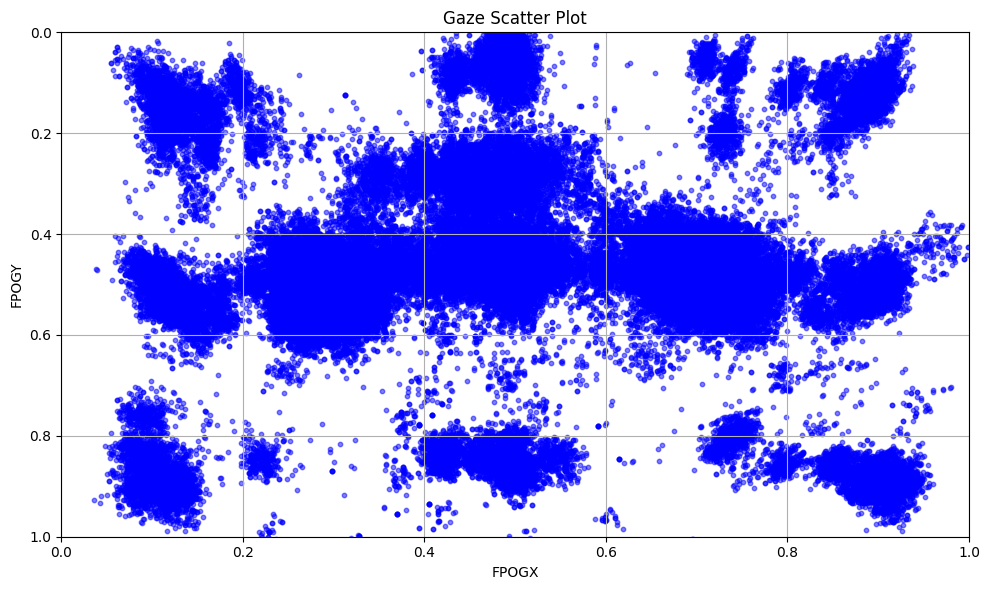

In [4]:
# Scatter plot of gaze positions
plt.figure(figsize=(10, 6))
plt.scatter(df_1['BPOGX'], df_1['BPOGY'], alpha=0.5, s=10, c='blue') # Parameter description: The X- and Y-coordinates of the fixation POG, as a fraction of the screen size. (0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right.
plt.title('Gaze Scatter Plot')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis() #(0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right. -> need to invert y-axis
plt.grid(True)
plt.tight_layout()
plt.savefig('gaze_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

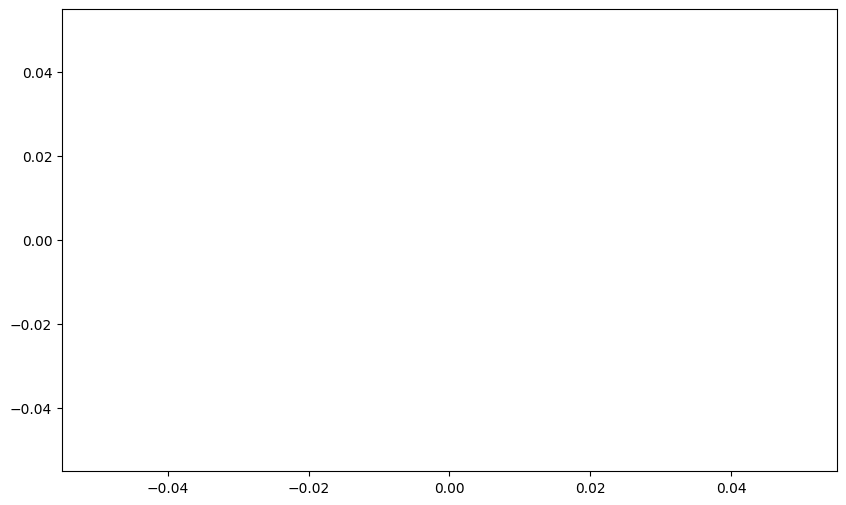

In [36]:
# === 3. Optional: Heatmap of gaze density (2D histogram) ===
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['FPOGX'], y=df['FPOGY'], fill=True, cmap='coolwarm', bw_adjust=0.1)
plt.title('Gaze Heatmap (FPOG)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('heatmap_plot.png', dpi=300, bbox_inches='tight')
plt.show()

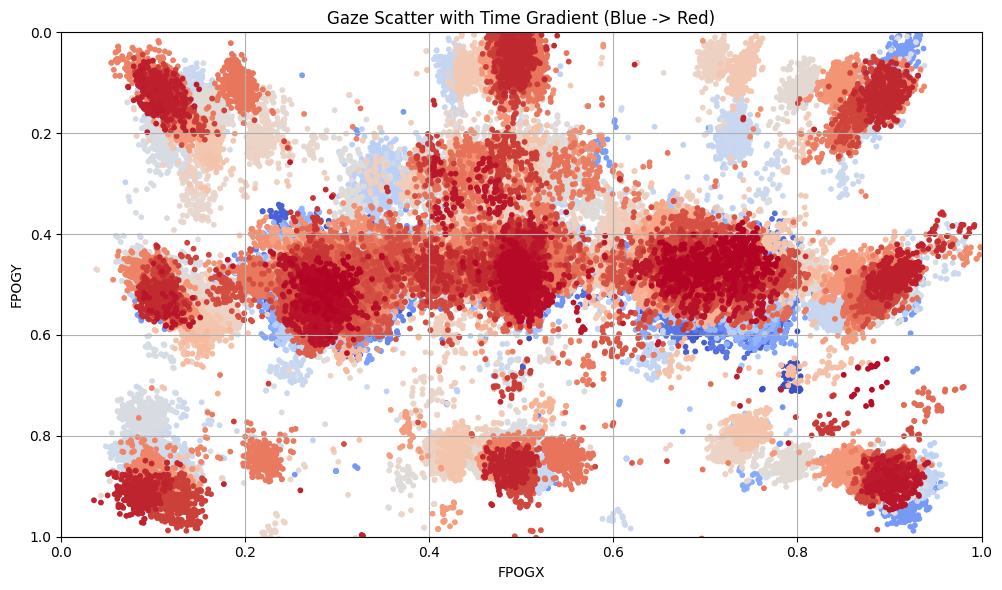

In [5]:
# Normalize time to 0–1 for color mapping
time_norm = (df_1['TIME'] - df_1['TIME'].min()) / (df_1['TIME'].max() - df_1['TIME'].min())

# Set up colormap from red to blue
colors = plt.cm.coolwarm(time_norm) 

# Plot with time-based color
plt.figure(figsize=(10, 6))
plt.scatter(df_1['BPOGX'], df_1['BPOGY'], color=colors, s=10)
plt.title('Gaze Scatter with Time Gradient (Blue -> Red)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis()

plt.savefig('gaze_scatter_time_plot.png', dpi=300, bbox_inches='tight')
plt.show()

         CNT       TIME    TIME_TICK    FPOGX    FPOGY      FPOGS    FPOGD  \
1895  130803  882.77222  28205129362  0.50467  0.47274  882.55792  0.21429   
1896  130804  882.77869  28205193685  0.50454  0.47243  882.55792  0.22076   
1897  130805  882.78516  28205258394  0.50460  0.47186  882.55792  0.22723   
1898  130806  882.79205  28205327617  0.50465  0.47133  882.55792  0.23413   
1899  130807  882.79852  28205392406  0.50461  0.47059  882.55792  0.24060   
...      ...        ...          ...      ...      ...        ...      ...   
2998  131906  890.16083  28279015215  0.68687  0.43742  888.92145  1.23938   
2999  131907  890.16687  28279075739  0.68699  0.43707  888.92145  1.24542   
3000  131908  890.17474  28279154413  0.68696  0.43706  888.92145  1.25330   
3001  131909  890.18042  28279211399  0.68702  0.43707  888.92145  1.25897   
3002  131910  890.18744  28279281274  0.68704  0.43730  888.92145  1.26599   

      FPOGID  FPOGV    LPOGX  ...  LPUPILV    REYEX    REYEY   

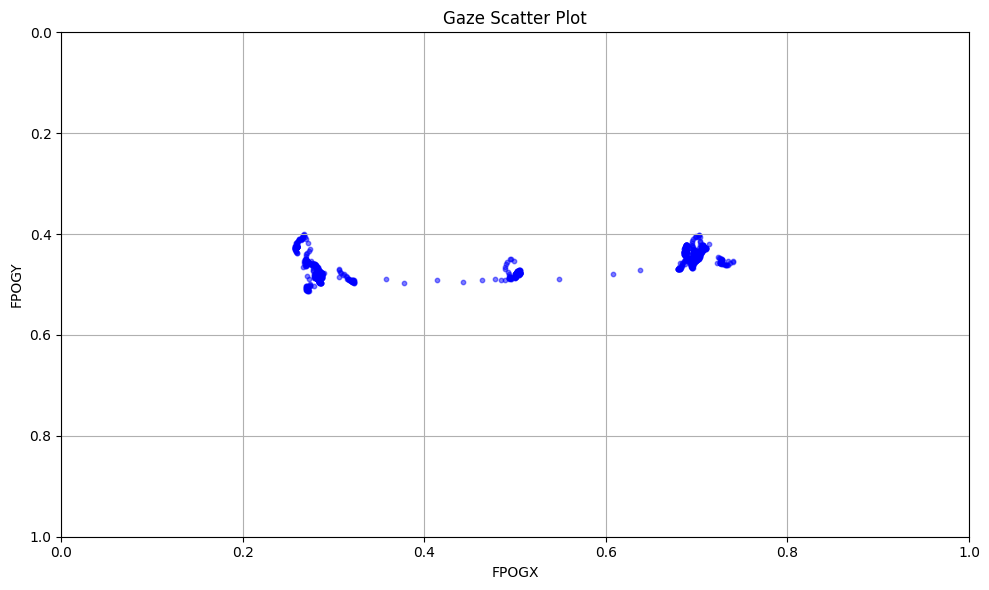

In [145]:
start_index = df[df['USER'] == 'TRIAL 2: BACKGROUND_DOMINANT_L'].index[0]

# === 3. Find the next fixation log ===
# You can change 'fixation' to your actual label (e.g., 'FIXATION_START')
fixation_mask = df.loc[start_index + 1:, 'USER'].str.contains('FIXATION_LOG', case=False, na=False)

# Get index of next fixation
next_fixation_index = fixation_mask[fixation_mask].index.min()

# If no fixation is found, take until end of file
end_index = next_fixation_index if pd.notna(next_fixation_index) else df.shape[0]

# === 4. Extract the data block ===
trial_block = df.loc[start_index:end_index - 1]
print(trial_block)
print(start_index, end_index)

plt.figure(figsize=(10, 6))
plt.scatter(trial_block['FPOGX'], trial_block['FPOGY'], alpha=0.5, s=10, c='blue') # Parameter description: The X- and Y-coordinates of the fixation POG, as a fraction of the screen size. (0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right.
plt.title('Gaze Scatter Plot')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis() #(0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right. -> need to invert y-axis
plt.grid(True)
plt.tight_layout()
plt.savefig('gaze_scatter_plot_TRIAL1.png', dpi=300, bbox_inches='tight')
plt.show()

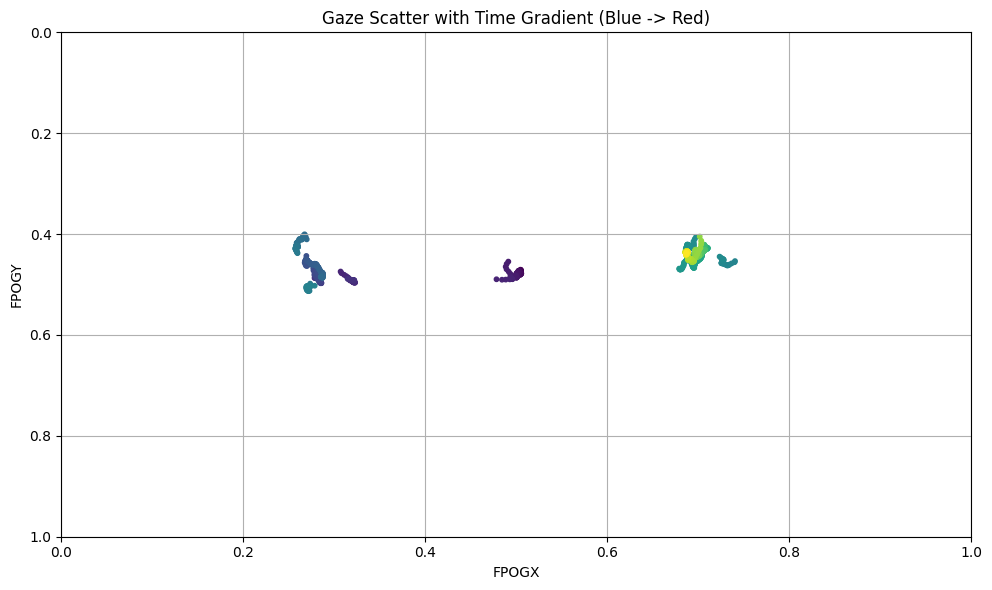

In [ ]:
# Normalize time to 0–1 for color mapping
time_norm = (trial_block['TIME'] - trial_block['TIME'].min()) / (trial_block['TIME'].max() - trial_block['TIME'].min())

# Set up colormap from red to blue
colors = plt.cm.viridis(time_norm) 

# Plot with time-based color
plt.figure(figsize=(10, 6))
plt.scatter(trial_block['FPOGX'], trial_block['FPOGY'], color=colors, s=10)
plt.title('Gaze Scatter with Time Gradient (Blue -> Red)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis()

plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject1_size_big_R.png', dpi=300, bbox_inches='tight')
plt.show()

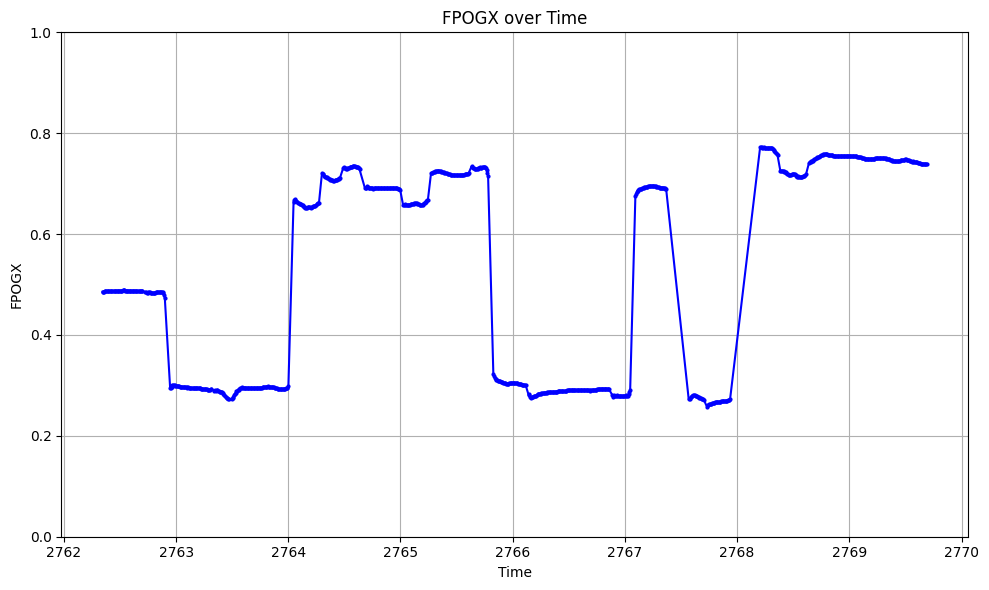

In [141]:
#plot time against FPOGX
plt.figure(figsize=(10, 6))
plt.plot(trial_block['TIME'], trial_block['FPOGX'], marker='o', linestyle='-', color='blue', markersize=2)
plt.title('FPOGX over Time')
plt.xlabel('Time')
plt.ylabel('FPOGX')
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 1)
plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject1_background_dominant_L_FPOGX_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

Total number of trials: 65
                                   USER        TIME
1                           START_TRIAL   870.07849
3                          FIXATION_LOG   870.09155
386                 TRIAL 1: SIZE_BIG_R   872.65729
1498                       FIXATION_LOG   880.11304
1895     TRIAL 2: BACKGROUND_DOMINANT_L   882.77222
...                                 ...         ...
170346                     FIXATION_LOG  2013.18616
176161  TRIAL 62: BACKGROUND_DOMINANT_L  2052.31177
177228                     FIXATION_LOG  2059.46558
178129           TRIAL 63: SIZE_SMALL_L  2065.50757
179273                       STOP_TRIAL  2073.17700

[128 rows x 2 columns]
                                   USER        TIME  TIME_DIFF
1                           START_TRIAL   870.07849    0.00000
3                          FIXATION_LOG   870.09155    0.01306
386                 TRIAL 1: SIZE_BIG_R   872.65729    2.56574
1498                       FIXATION_LOG   880.11304    7.45575
1895     T

C:\Users\madle\AppData\Local\Temp\ipykernel_17456\2346884160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_entries['TIME_DIFF'] = trial_entries['TIME'].diff().fillna(0)


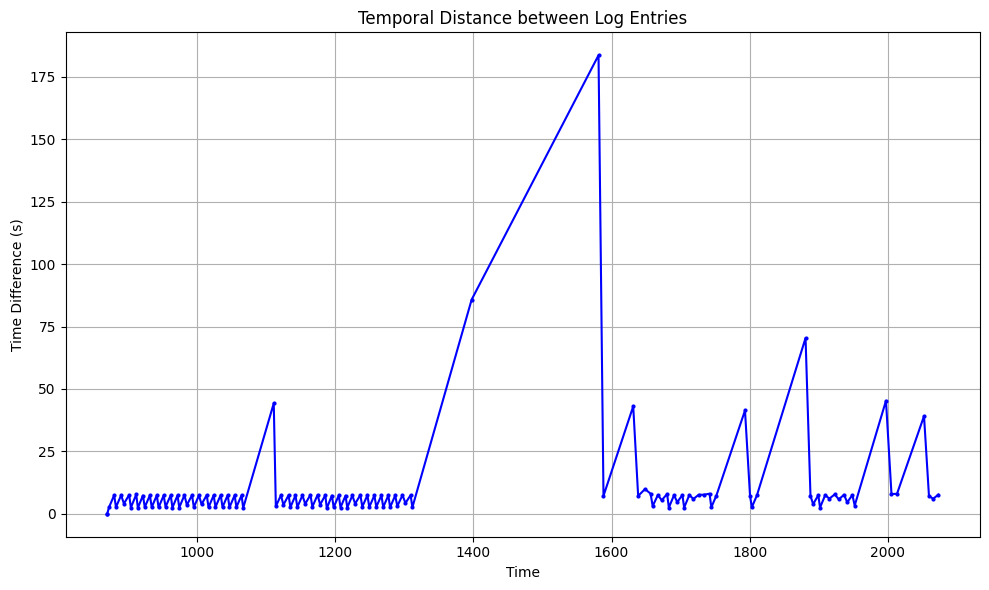

C:\Users\madle\AppData\Local\Temp\ipykernel_17456\2346884160.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


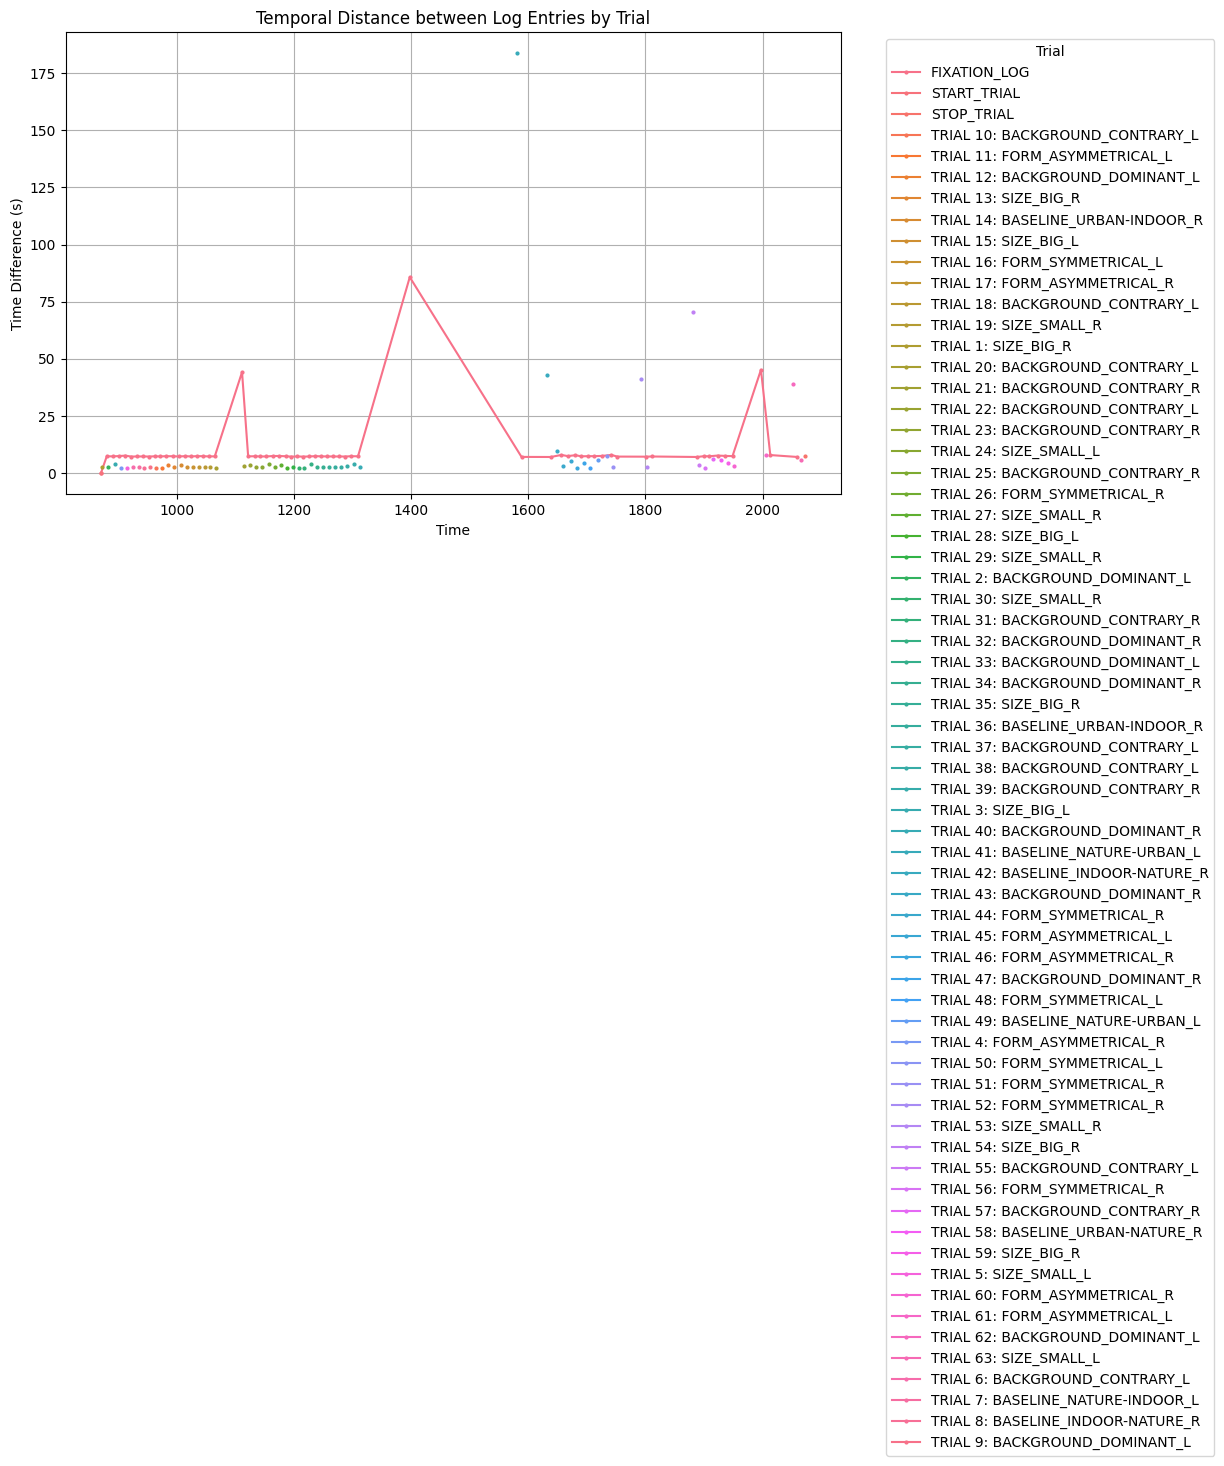

In [146]:
# count all the entries that contain 'TRIAL' in some sort of way and print the count
trial_count = df['USER'].str.contains('TRIAL', case=False, na=False).sum()
print(f'Total number of trials: {trial_count}')
# print the log entries that contain 'TRIAL' or 'FIXATION' in some sort of way
trial_entries = df[df['USER'].str.contains('TRIAL|FIXATION', case=False, na=False)]
print(trial_entries[['USER', 'TIME']])
# calcuate the temporal distance between the log entries
trial_entries['TIME_DIFF'] = trial_entries['TIME'].diff().fillna(0)
print(trial_entries[['USER', 'TIME', 'TIME_DIFF']])

# show the data in a plot
plt.figure(figsize=(10, 6))
plt.plot(trial_entries['TIME'], trial_entries['TIME_DIFF'], marker='o', linestyle
='-', color='blue', markersize=2)
plt.title('Temporal Distance between Log Entries')
plt.xlabel('Time')
plt.ylabel('Time Difference (s)')
plt.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject2_background_dominant_L_time_diff_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

#give the plot for each trial a different color
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", trial_count)  # Generate a color palette with as many colors as trials
for i, (trial_name, group) in enumerate(trial_entries.groupby('USER')):
    plt.plot(group['TIME'], group['TIME_DIFF'], marker='o', linestyle='-', color=colors[i % len(colors)], markersize=2, label=trial_name)
plt.title('Temporal Distance between Log Entries by Trial')
plt.xlabel('Time')  
plt.ylabel('Time Difference (s)')
plt.grid(True)
plt.legend(title='Trial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject2_background_dominant_L_time_diff_over_time_by_trial.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
def dispersion(x, y):
    return (np.max(x)-np.min(x)) + (np.max(y)-np.min(y))

def i_dt(x, y, disp_t, dur_t_ms=100, smpl_freq=500):

    # compute number of samples in a time window
    dur_t_s = dur_t_ms/1000 # convert duration threshold to seconds
    dur_t = int(dur_t_s*smpl_freq)

    # initialize index
    i = 0
    fixations = {"fix_start_idx":[], "fix_end_idx":[]}

    # find the start and end of a fixation using the dispersion threshold and the time window
    while i + dur_t <= len(x):
        window_x = x.iloc[i:i+dur_t]
        window_y = y.iloc[i:i+dur_t]
        disp = dispersion(window_x,window_y)

        if disp > disp_t:
            i += 1
            continue

        j = 1
        while (i + dur_t + j <= len(x)) and (dispersion(x.iloc[i:i+dur_t+j],y.iloc[i:i+dur_t+j]) <= disp_t):
            j += 1

        j -= 1

        fixations["fix_start_idx"].append(i)
        fixations["fix_end_idx"].append(i+dur_t+j-1)

        i = i + dur_t + j

    return fixations

In [60]:
#in the user column are the trial numbers and names, for each Trial name that continues SIZE,
#give back the entire trial data meaning from the trial name to the fixation log
#the last trial ends at Stop and not fixation log, and not missing any trial
def get_trial_data(df, trial_name):
    # Find the start index of the trial
    start_index = df[df['USER'].str.contains(trial_name, case=False, na=False)].index[0]
    
    # Find the end index of the trial (next 'FIXATION_LOG' or 'STOP')
    next_fixation_mask = df['USER'].str.contains('FIXATION_LOG|STOP', case=False, na=False)
    end_index = df[next_fixation_mask].index[df[next_fixation_mask].index > start_index].min()
    
    # If no next fixation or stop is found, take until the end of the DataFrame
    if pd.isna(end_index):
        end_index = df.shape[0]
    
    # Extract the trial data
    trial_data = df.loc[start_index:end_index - 1]
    
    return trial_data


#data set with all the trials that contain SIZE in the name, give every trial, it should be 16 in total
#with SIZE containing in the name in the data frame df_1
size_trials = df_1[df_1['USER'].str.contains('SIZE', case=False, na=False)]
#print the number of trials with SIZE in the name
print(f'Total number of trials with SIZE in the name: {len(size_trials)}')


Total number of trials with SIZE in the name: 15


In [61]:
results_disp = i_dt(df_1["BPOGX"],df_1["BPOGY"],disp_t=2)
results_disp_df = pd.DataFrame(results_disp)

# Add the fixation start and end times in s to the results data frame (using the indices return by the detection algorithm)
results_disp_df["fix_start"] = df_1["TIME"].iloc[results_disp_df["fix_start_idx"]].values
results_disp_df["fix_end"] = df_1["TIME"].iloc[results_disp_df["fix_end_idx"]].values

# Compute the fixation durations since they will be needed for the benchmark plots in part 2
results_disp_df["fix_dur"] = results_disp_df["fix_end"] - results_disp_df["fix_start"]
results_disp_df.head(5)

,fix_start_idx,fix_end_idx,fix_start,fix_end,fix_dur
0,0,29264,870.07196,1078.43384,208.36188
1,29287,29819,1078.86877,1082.84094,3.97217
2,29820,29877,1082.98828,1083.57776,0.58948
3,29878,63629,1083.58875,1324.28638,240.69763
4,63630,63705,1324.37317,1325.11670,0.74353


C:\Users\madle\AppData\Local\Temp\ipykernel_29096\524278182.py:6: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_disp_df["fix_end"], df_1["BPOGX"].iloc[results_disp_df["fix_end_idx"]],


[]

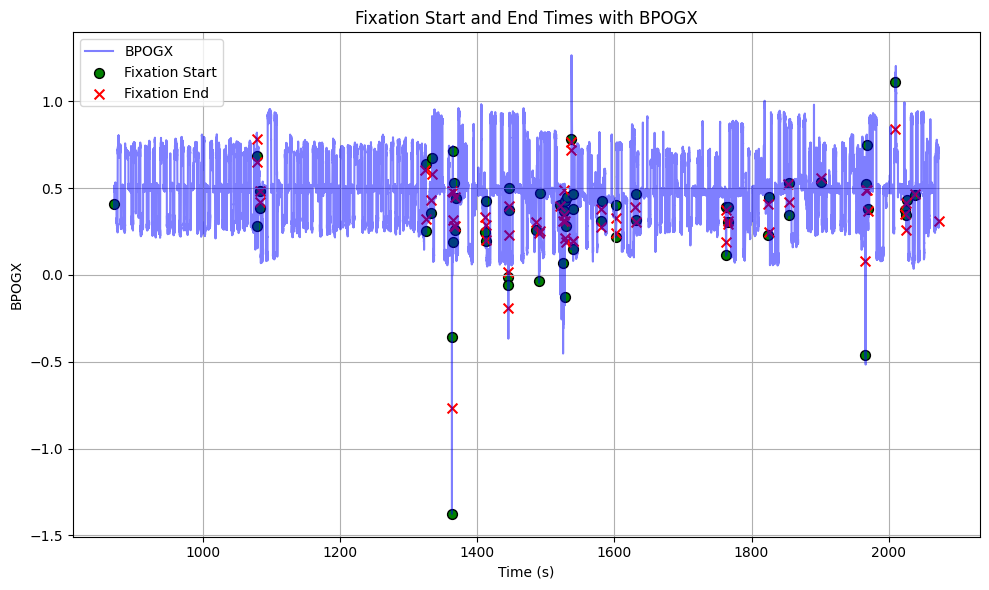

In [51]:
# plot the fixation start and end times and the eye position BGOGX over time
plt.figure(figsize=(10, 6))
plt.plot(df_1["TIME"], df_1["BPOGX"], label="BPOGX", color='blue', alpha=0.5)
plt.scatter(results_disp_df["fix_start"], df_1["BPOGX"].iloc[results_disp_df["fix_start_idx"]],
            label="Fixation Start", color='green', marker='o', s=50, edgecolor='black')
plt.scatter(results_disp_df["fix_end"], df_1["BPOGX"].iloc[results_disp_df["fix_end_idx"]],
            label="Fixation End", color='red', marker='x', s=50, edgecolor='black')
plt.title('Fixation Start and End Times with BPOGX')    
plt.xlabel('Time (s)')
plt.ylabel('BPOGX')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.plot()

In [62]:
# i want the i-dt for the selected data sets i got with the get_trial_data function
trial_data_1 = get_trial_data(df_1, 'SIZE')
results_trial_1 = i_dt(trial_data_1["BPOGX"], trial_data_1["BPOGY"], disp_t=0.05)
results_trial_1_df = pd.DataFrame(results_trial_1)
# Add the fixation start and end times in s to the results data frame (using the indices return by the detection algorithm)
results_trial_1_df["fix_start"] = trial_data_1["TIME"].iloc[results_trial_1_df["fix_start_idx"]].values
results_trial_1_df["fix_end"] = trial_data_1["TIME"].iloc[results_trial_1_df["fix_end_idx"]].values
# Compute the fixation durations since they will be needed for the benchmark plots in part 2
results_trial_1_df["fix_dur"] = results_trial_1_df["fix_end"] - results_trial_1_df["fix_start"]
results_trial_1_df.head(5)

,fix_start_idx,fix_end_idx,fix_start,fix_end,fix_dur


In [ ]:
# the fixations should be label according to the range of the BPOGY values, if the fixation lies
# in the range 0.4 and 0.6 then the label is no image, if the fixation lies in 0.6 and 0.8 then the label is right image,
# if the range is 0.2 and 0.4 then the label is left image
# add a column to the results_trial_df with the label
def label_fixation(row):
    if 0.4 <= row['BPOGX_start'] <= 0.6:
        return 'no image'
    elif 0.6 < row['BPOGX_start'] <= 0.8:
        return 'right image'
    elif 0.2 <= row['BPOGX_start'] < 0.4:
        return 'left image'
    else:
        return 'unknown'

#get all the trials that contain SIZE in the name, the trial name is not exactly the same in the names, 
#so just get all the trials that contain SIZE in the name
size_trials = df_1[df_1['USER'].str.contains('SIZE', case=False, na=False)]
print(f'Total number of trials with SIZE in the name: {len(size_trials)}')
# now use the get_trial_data function to get the trial data for each trial
for index, row in size_trials.iterrows():   
    trial_name = row['USER']
    trial_data = get_trial_data(df_1, trial_name)
    results_trial = i_dt(trial_data["BPOGX"], trial_data["BPOGY"], disp_t=0.15)
    results_trial_df = pd.DataFrame(results_trial)
    
    # Add the fixation start and end times in s to the results data frame (using the indices return by the detection algorithm)
    results_trial_df["fix_start"] = trial_data["TIME"].iloc[results_trial_df["fix_start_idx"]].values
    results_trial_df["fix_end"] = trial_data["TIME"].iloc[results_trial_df["fix_end_idx"]].values
    
    # Compute the fixation durations since they will be needed for the benchmark plots in part 2
    results_trial_df["fix_dur"] = results_trial_df["fix_end"] - results_trial_df["fix_start"]

    # add the BPOGX to the results_trial_df for fix start and end
    results_trial_df["BPOGX_start"] = trial_data["BPOGX"].iloc[results_trial_df["fix_start_idx"]].values
    results_trial_df["BPOGX_end"] = trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]].values

    #add the BPOGY to the results_trial_df for fix start and end
    results_trial_df["BPOGY_start"] = trial_data["BPOGY"].iloc[results_trial_df["fix_start_idx"]].values
    results_trial_df["BPOGY_end"] = trial_data["BPOGY"].iloc[results_trial_df["fix_end_idx"]].values

    # label the fixations according to the BPOGX values
    results_trial_df["label"] = results_trial_df.apply(label_fixation, axis=1)

    # for each trial get the first entry that does not say 'no image' in the label column, then plot them in a scatter plot
    # with the BPOGX_start value and the trial names
    plt.figure(figsize=(10, 6))
    first_valid = results_trial_df[results_trial_df['label'] != 'no image'].iloc[0]
    plt.scatter(first_valid['BPOGX_start'], first_valid['BPOGY_start'], label=trial_name, alpha=0.5, s=100)
    plt.title('Fixation Start Positions by Trial')
    plt.xlabel('BPOGX Start')
    plt.ylabel('BPOGY Start') 
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.plot()
    
    print(f'Trial: {trial_name}')
    print(results_trial_df.head(5))


Total number of trials with SIZE in the name: 15
Trial: TRIAL 1: SIZE_BIG_R
   fix_start_idx  fix_end_idx  fix_start    fix_end  fix_dur  BPOGX_start  \
0              0          115  872.65729  873.42847  0.77118      0.49182   
1            119          234  873.49481  874.26532  0.77051      0.31705   
2            235          358  874.27191  875.14313  0.87122      0.26528   
3            398          492  875.45105  876.12079  0.66974      0.70342   
4            565          657  876.69067  877.32635  0.63568      0.70583   

   BPOGX_end        label  
0    0.48976     no image  
1    0.26804   left image  
2    0.28013   left image  
3    0.74247  right image  
4    0.69473  right image  
Trial: TRIAL 3: SIZE_BIG_L
   fix_start_idx  fix_end_idx  fix_start    fix_end  fix_dur  BPOGX_start  \
0            114          169  895.19775  895.58667  0.38892      0.28895   
1            170          417  895.59332  897.28845  1.69513      0.31481   
2            418          510  897.

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


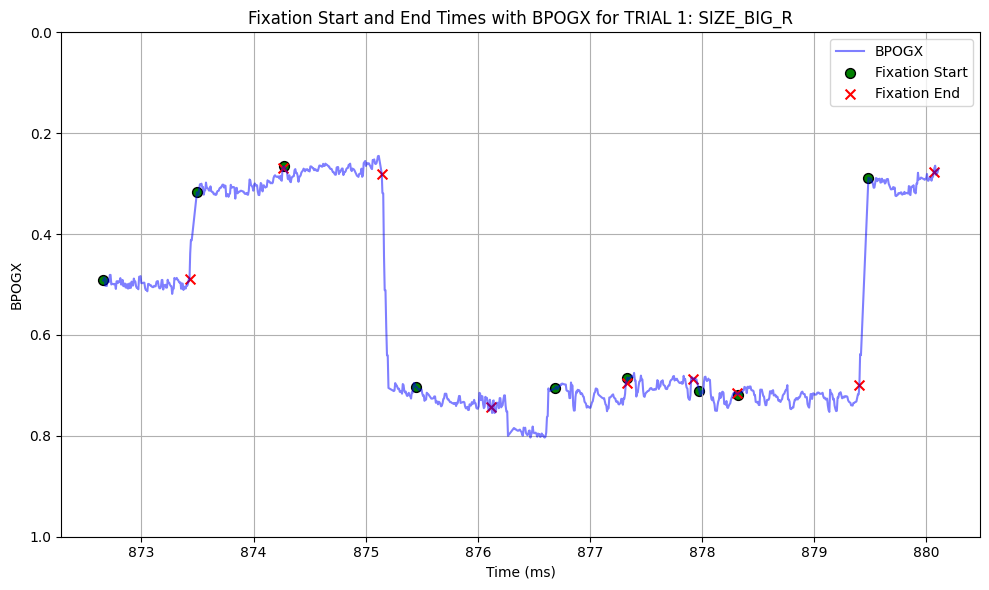

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


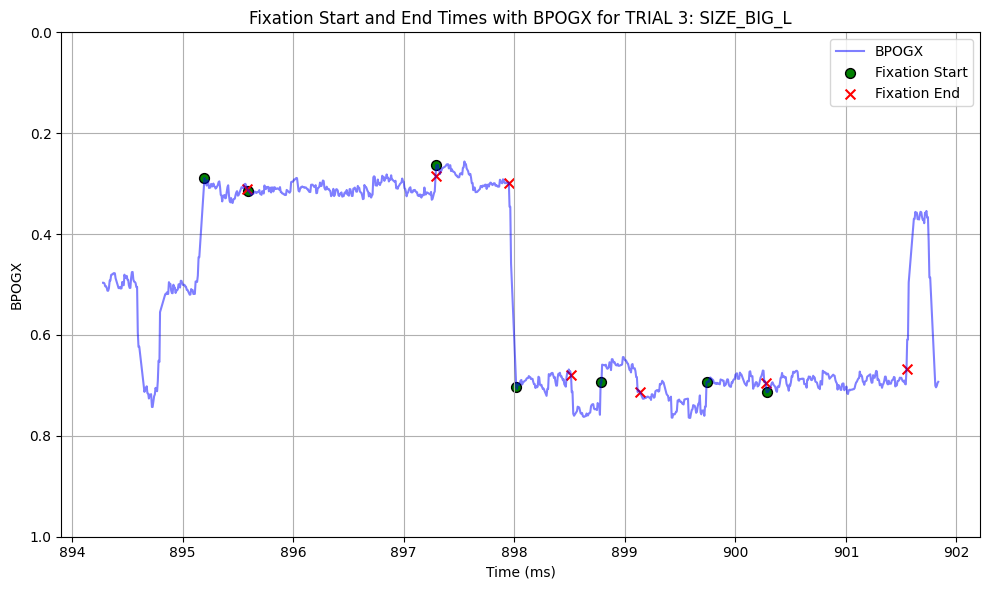

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


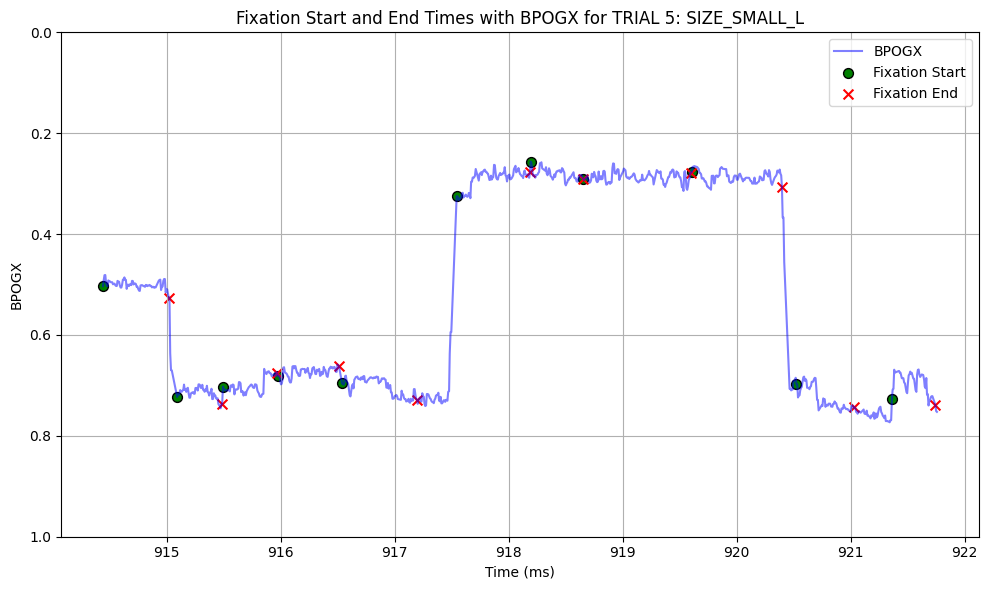

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


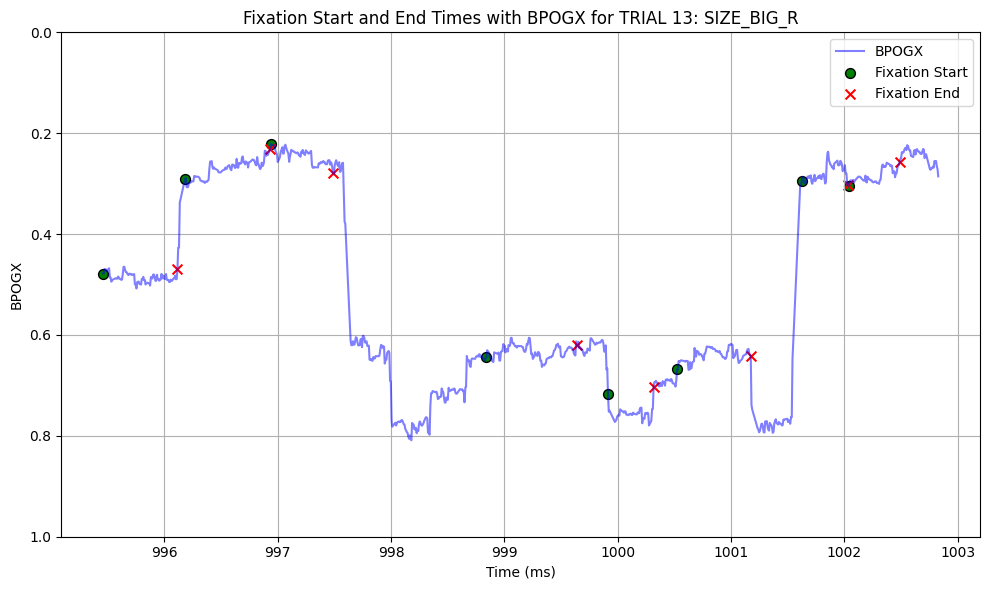

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


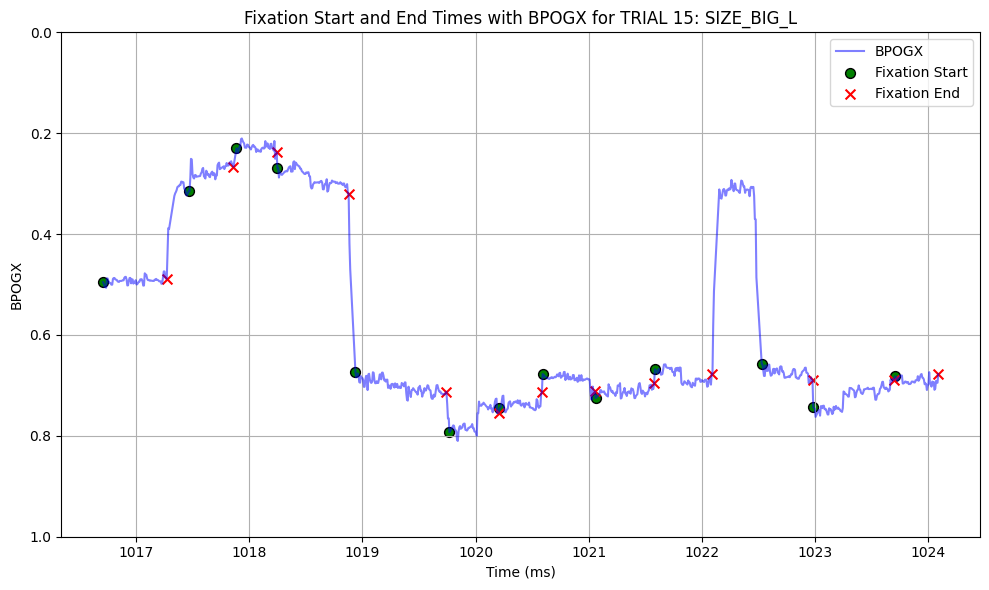

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


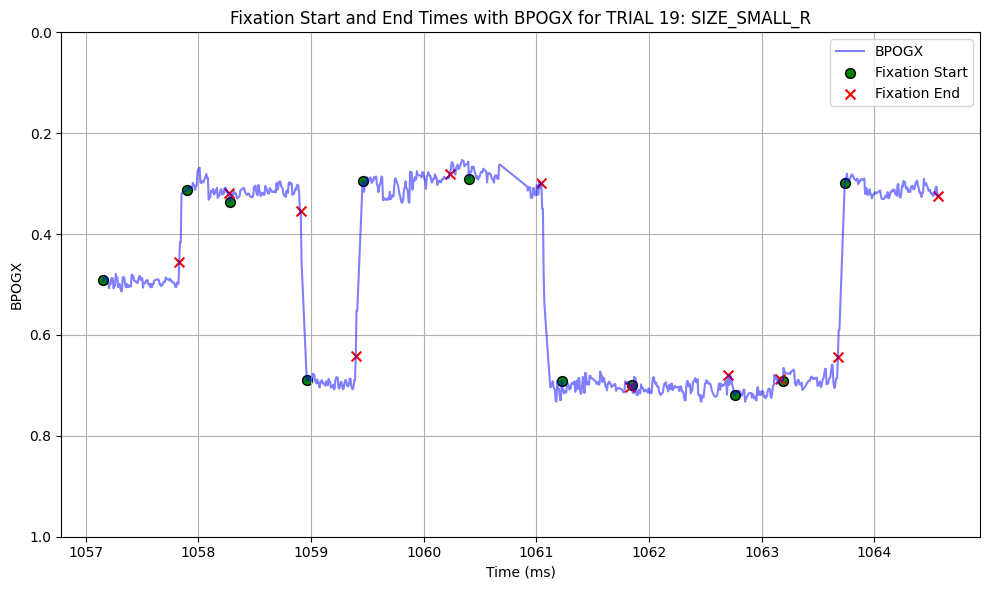

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


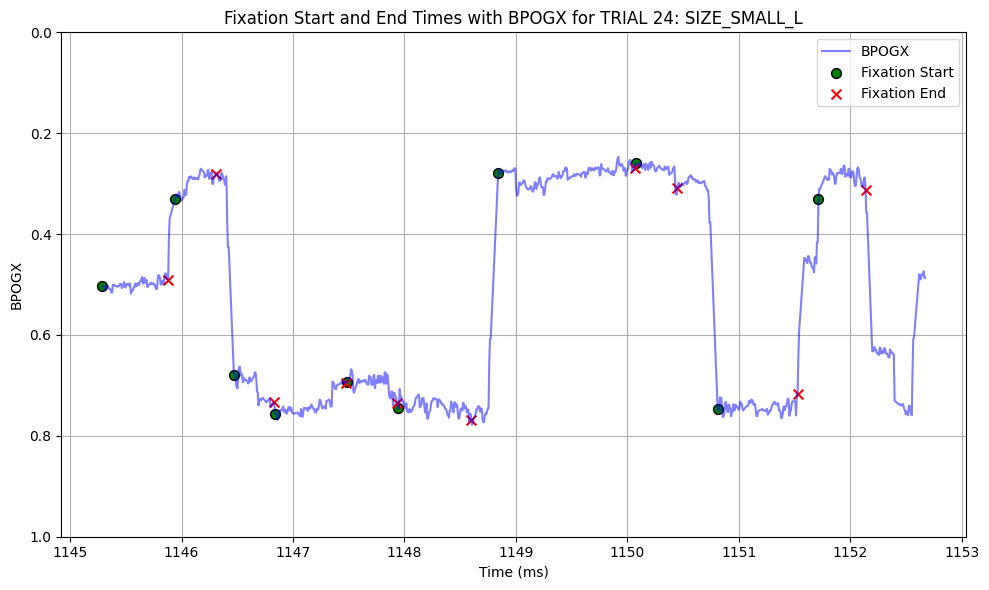

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


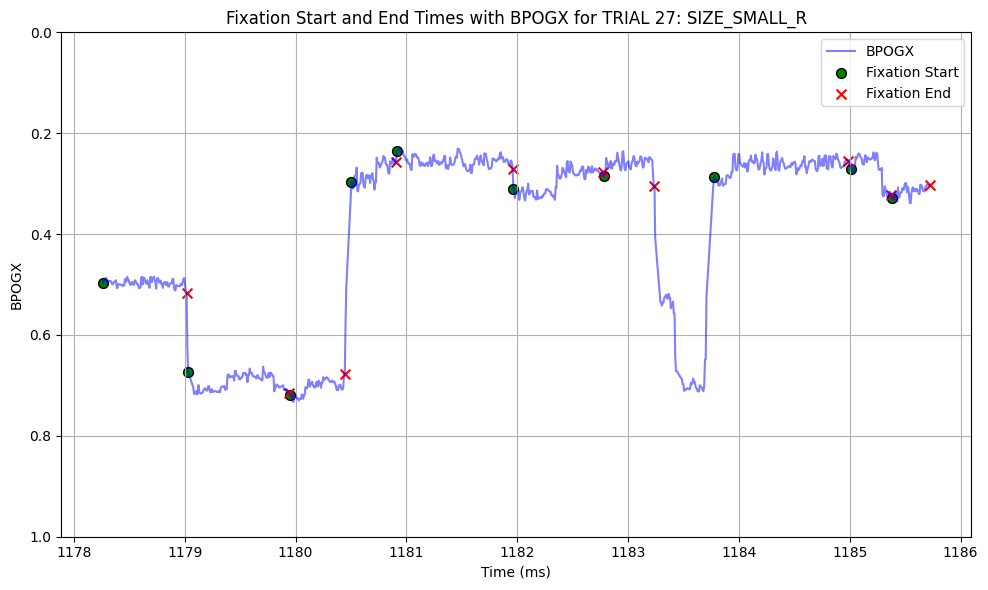

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


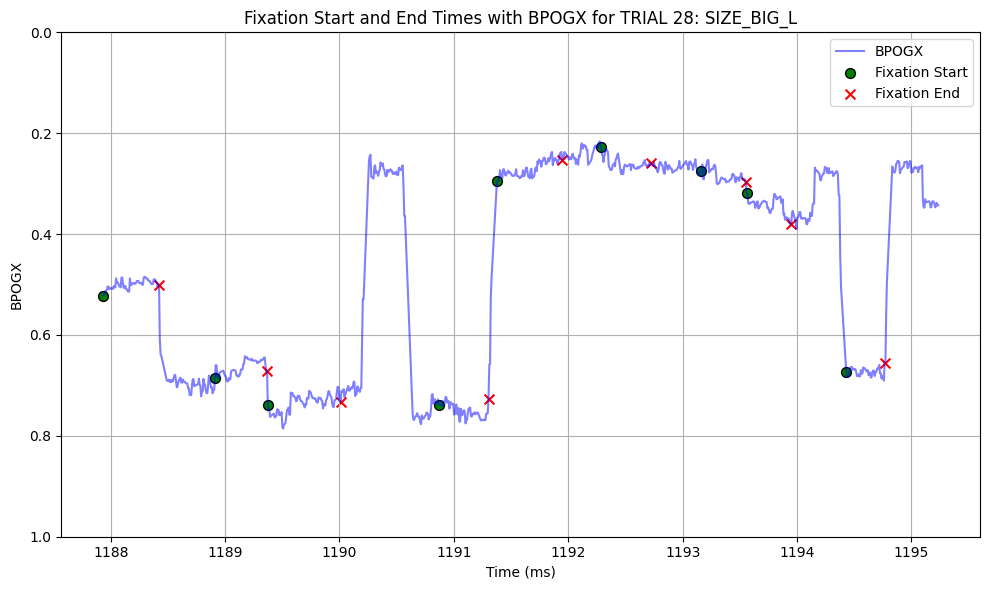

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


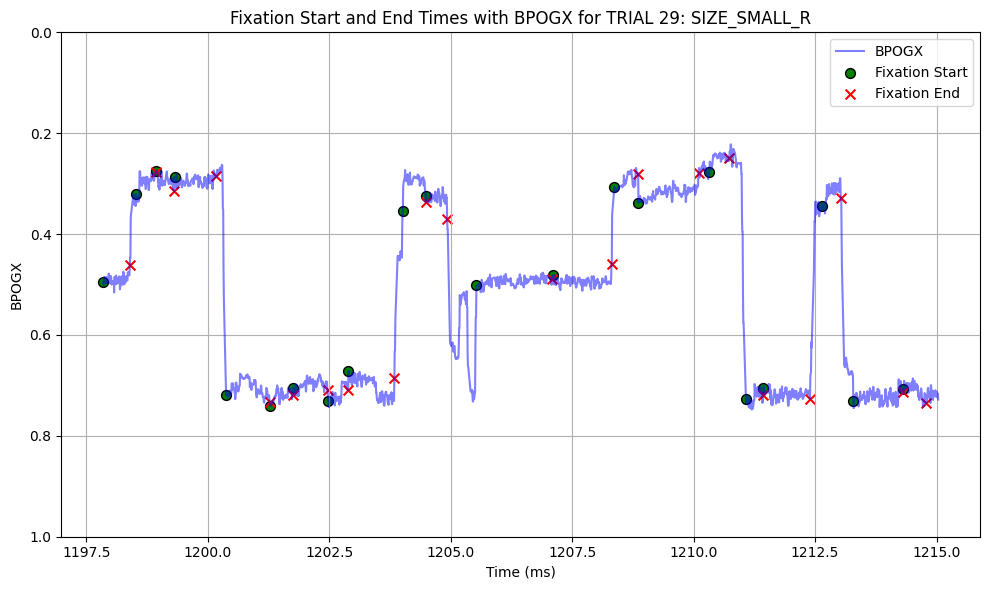

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


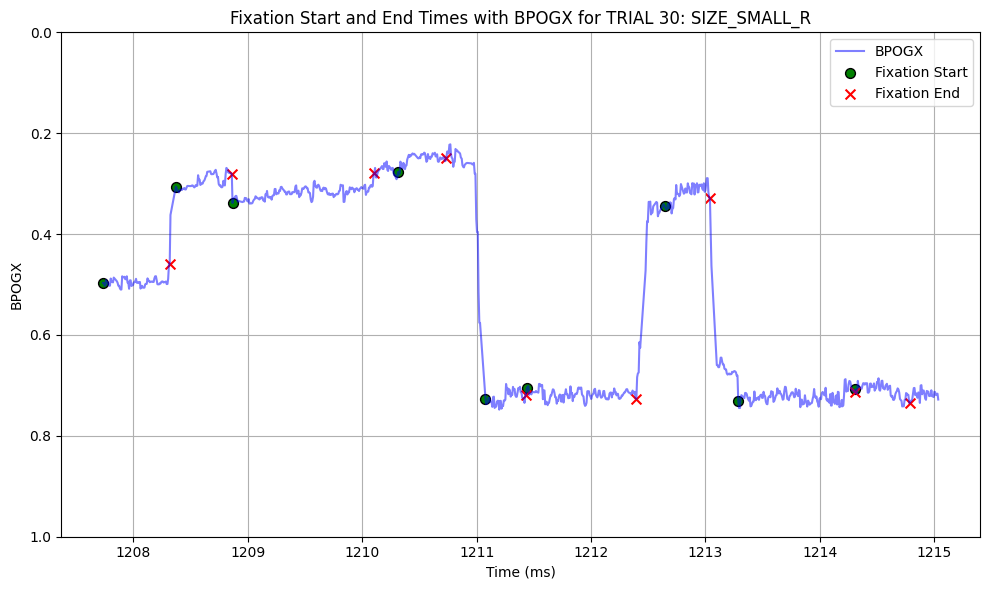

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


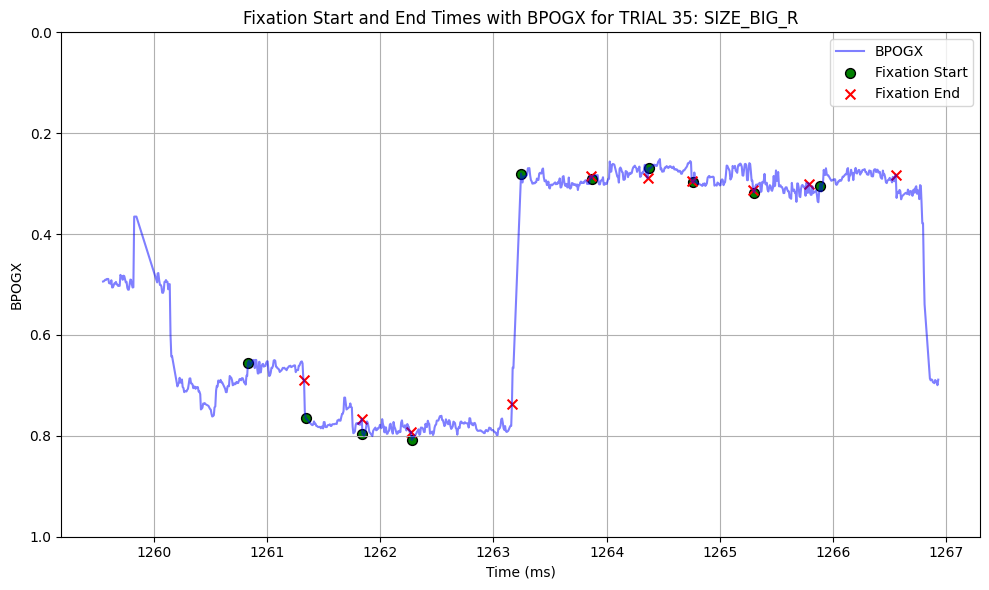

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


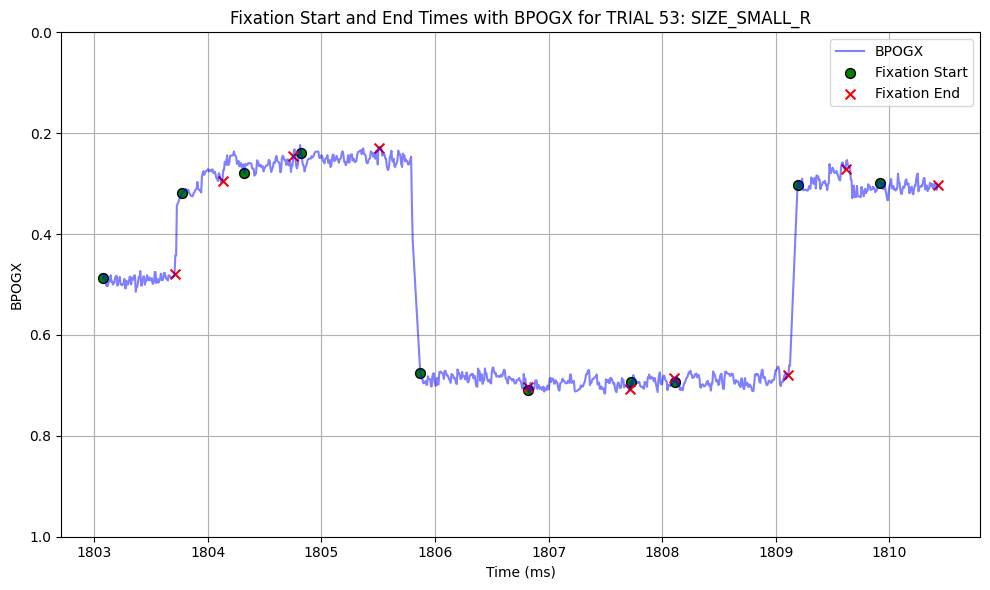

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


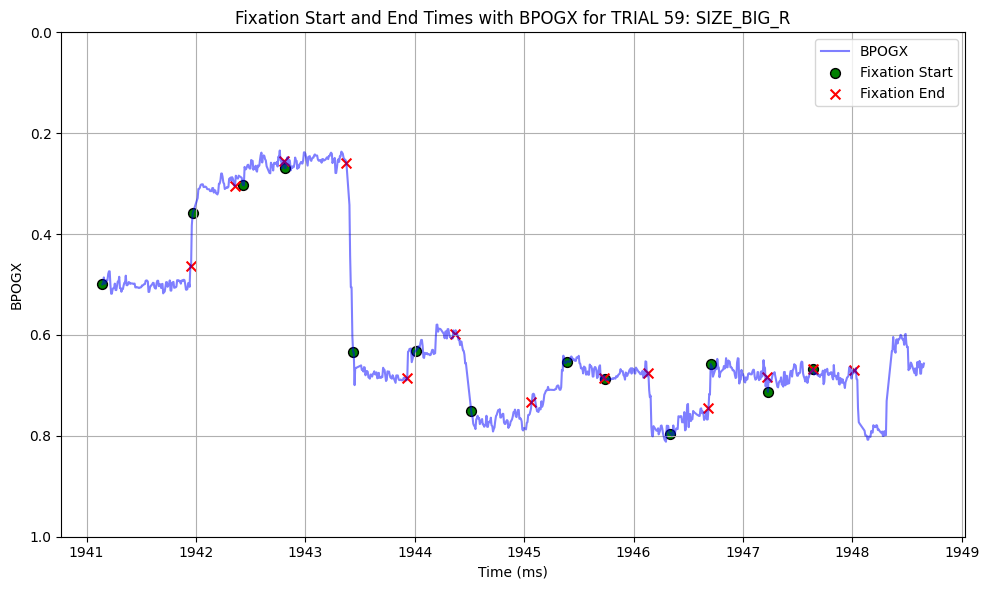

C:\Users\madle\AppData\Local\Temp\ipykernel_29096\1590193467.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],


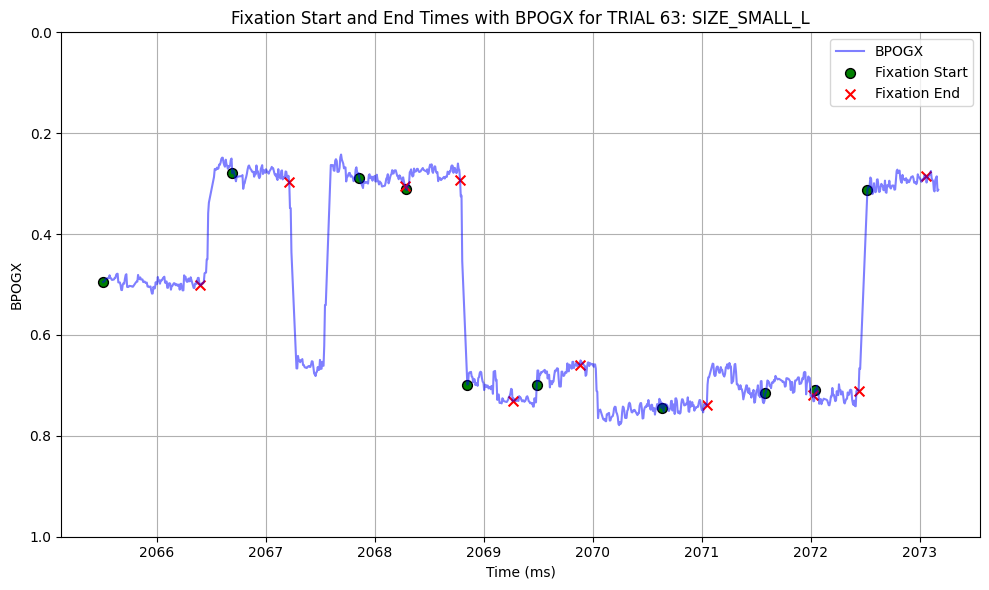

In [73]:
# for each trial that contains SIZE in the name, plot the fixation start and end times and the eye position BPOGX over time
for index, row in size_trials.iterrows():
    trial_name = row['USER']
    trial_data = get_trial_data(df_1, trial_name)
    results_trial = i_dt(trial_data["BPOGX"], trial_data["BPOGY"], disp_t=0.15)
    results_trial_df = pd.DataFrame(results_trial)
    
    # Add the fixation start and end times in s to the results data frame (using the indices return by the detection algorithm)
    results_trial_df["fix_start"] = trial_data["TIME"].iloc[results_trial_df["fix_start_idx"]].values
    results_trial_df["fix_end"] = trial_data["TIME"].iloc[results_trial_df["fix_end_idx"]].values
    
    # Compute the fixation durations since they will be needed for the benchmark plots in part 2
    results_trial_df["fix_dur"] = results_trial_df["fix_end"] - results_trial_df["fix_start"]

    # add the BPOGX to the results_trial_df for fix start and end
    results_trial_df["BPOGX_start"] = trial_data["BPOGX"].iloc[results_trial_df["fix_start_idx"]].values
    results_trial_df["BPOGX_end"] = trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]].values

    
    plt.figure(figsize=(10, 6))
    plt.plot(trial_data["TIME"], trial_data["BPOGX"], label="BPOGX", color='blue', alpha=0.5)
    plt.scatter(results_trial_df["fix_start"], trial_data["BPOGX"].iloc[results_trial_df["fix_start_idx"]],
                label="Fixation Start", color='green', marker='o', s=50, edgecolor='black')
    plt.scatter(results_trial_df["fix_end"], trial_data["BPOGX"].iloc[results_trial_df["fix_end_idx"]],
                label="Fixation End", color='red', marker='x', s=50, edgecolor='black')
    plt.title(f'Fixation Start and End Times with BPOGX for {trial_name}')    
    #scale the axis with BPOGX to 0-1
    plt.ylim(0, 1)
    #the origin is at the top left corner, so invert the y-axis
    plt.gca().invert_yaxis()
    plt.xlabel('Time (ms)')
    plt.ylabel('BPOGX')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()